Пример взят с сайта [scikit-learn.org](https://scikit-learn.org/stable/auto_examples/applications/plot_cyclical_feature_engineering.html#sphx-glr-download-auto-examples-applications-plot-cyclical-feature-engineering-py)

In [1]:
import sklearn
vers = sklearn.__version__
if vers=='1.0':
  print('OK - we have correct version for skilearn:',vers)
else:
  print('NB! - current version for skilearn:',vers,'.Need upgrade')
  %pip install --upgrade scikit-learn

OK - we have correct version for skilearn: 1.0


# Load dataset - Bike Sharing Demand dataset

In [2]:
from sklearn.datasets import fetch_openml

bike_sharing = fetch_openml("Bike_Sharing_Demand", version=2, as_frame=True)
df = bike_sharing.frame

In [4]:
df["count"].max()

977.0

normalise demand value - max demands = 977<br>
let's work with percents from the value of demands: `df["count"] / 1000`

In [5]:
y = df["count"] / 1000

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

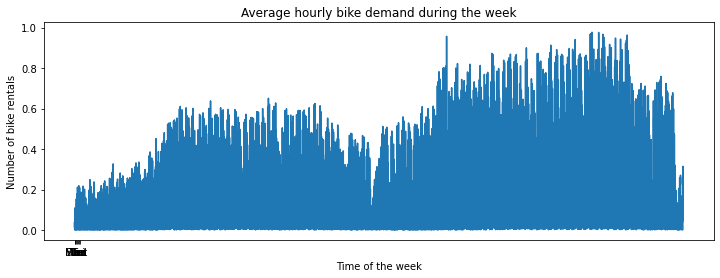

In [8]:
fig, ax = plt.subplots(figsize=(12, 4))
y.plot(ax=ax)
_ = ax.set(
    title="Average hourly bike demand during the week",
    xticks=[i * 24 for i in range(7)],
    xticklabels=["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"],
    xlabel="Time of the week",
    ylabel="Number of bike rentals",
)

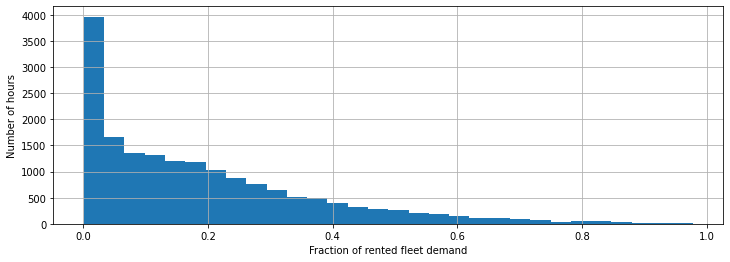

In [9]:
fig, ax = plt.subplots(figsize=(12, 4))
y.hist(bins=30, ax=ax)
_ = ax.set(
    xlabel="Fraction of rented fleet demand",
    ylabel="Number of hours",
)

In [10]:
X = df.drop("count", axis="columns")
X

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
0,spring,0.0,1.0,0.0,False,6.0,False,clear,9.84,14.395,0.81,0.0000
1,spring,0.0,1.0,1.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000
2,spring,0.0,1.0,2.0,False,6.0,False,clear,9.02,13.635,0.80,0.0000
3,spring,0.0,1.0,3.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000
4,spring,0.0,1.0,4.0,False,6.0,False,clear,9.84,14.395,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,1.0,12.0,19.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014
17375,spring,1.0,12.0,20.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014
17376,spring,1.0,12.0,21.0,False,1.0,True,clear,10.66,12.880,0.60,11.0014
17377,spring,1.0,12.0,22.0,False,1.0,True,clear,10.66,13.635,0.56,8.9981


## Time-based cross-validation

Поскольку набор данных представляет собой упорядоченный по времени журнал событий (почасовая потребность), мы будем использовать чувствительный ко времени сплиттер перекрестной проверки, чтобы максимально реалистично оценить нашу модель прогнозирования спроса. Мы используем 2-дневный промежуток между train и test. Мы также ограничиваем размер train выборки, чтобы сделать работу CV folds более стабильной.

1000 контрольных точек данных должно быть достаточно для количественной оценки производительности модели. Это составляет чуть меньше полутора месяцев непрерывных тестовых данных:


In [11]:
from sklearn.model_selection import TimeSeriesSplit

ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=48,
    max_train_size=10000,
    test_size=1000,
)

Давайте вручную проверим различные разделения, чтобы убедиться, что `TimeSeriesSplit` работает так, как мы ожидаем, начиная с первого разделения:


In [12]:
all_splits = list(ts_cv.split(X, y))
train_0, test_0 = all_splits[0]

In [13]:
all_splits

[(array([ 2331,  2332,  2333, ..., 12328, 12329, 12330]),
  array([12379, 12380, 12381, 12382, 12383, 12384, 12385, 12386, 12387,
         12388, 12389, 12390, 12391, 12392, 12393, 12394, 12395, 12396,
         12397, 12398, 12399, 12400, 12401, 12402, 12403, 12404, 12405,
         12406, 12407, 12408, 12409, 12410, 12411, 12412, 12413, 12414,
         12415, 12416, 12417, 12418, 12419, 12420, 12421, 12422, 12423,
         12424, 12425, 12426, 12427, 12428, 12429, 12430, 12431, 12432,
         12433, 12434, 12435, 12436, 12437, 12438, 12439, 12440, 12441,
         12442, 12443, 12444, 12445, 12446, 12447, 12448, 12449, 12450,
         12451, 12452, 12453, 12454, 12455, 12456, 12457, 12458, 12459,
         12460, 12461, 12462, 12463, 12464, 12465, 12466, 12467, 12468,
         12469, 12470, 12471, 12472, 12473, 12474, 12475, 12476, 12477,
         12478, 12479, 12480, 12481, 12482, 12483, 12484, 12485, 12486,
         12487, 12488, 12489, 12490, 12491, 12492, 12493, 12494, 12495,
      

In [14]:
X.iloc[test_0]

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
12379,summer,1.0,6.0,0.0,False,2.0,True,clear,22.14,25.760,0.68,27.9993
12380,summer,1.0,6.0,1.0,False,2.0,True,misty,21.32,25.000,0.77,22.0028
12381,summer,1.0,6.0,2.0,False,2.0,True,rain,21.32,25.000,0.72,19.9995
12382,summer,1.0,6.0,3.0,False,2.0,True,rain,20.50,24.240,0.82,12.9980
12383,summer,1.0,6.0,4.0,False,2.0,True,rain,20.50,24.240,0.82,12.9980
...,...,...,...,...,...,...,...,...,...,...,...,...
13374,fall,1.0,7.0,11.0,False,1.0,True,clear,34.44,40.150,0.53,15.0013
13375,fall,1.0,7.0,12.0,False,1.0,True,clear,34.44,39.395,0.49,8.9981
13376,fall,1.0,7.0,13.0,False,1.0,True,clear,34.44,39.395,0.49,19.0012
13377,fall,1.0,7.0,14.0,False,1.0,True,clear,36.08,40.910,0.42,7.0015


In [15]:
X.iloc[train_0]

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
2331,summer,0.0,4.0,1.0,False,2.0,True,misty,25.42,31.060,0.50,6.0032
2332,summer,0.0,4.0,2.0,False,2.0,True,misty,24.60,31.060,0.53,8.9981
2333,summer,0.0,4.0,3.0,False,2.0,True,misty,23.78,27.275,0.56,8.9981
2334,summer,0.0,4.0,4.0,False,2.0,True,misty,22.96,26.515,0.64,8.9981
2335,summer,0.0,4.0,5.0,False,2.0,True,misty,22.14,25.760,0.68,8.9981
...,...,...,...,...,...,...,...,...,...,...,...,...
12326,summer,1.0,6.0,19.0,False,6.0,False,clear,26.24,31.060,0.36,11.0014
12327,summer,1.0,6.0,20.0,False,6.0,False,clear,25.42,31.060,0.35,19.0012
12328,summer,1.0,6.0,21.0,False,6.0,False,clear,24.60,31.060,0.40,7.0015
12329,summer,1.0,6.0,22.0,False,6.0,False,clear,23.78,27.275,0.46,8.9981


We now inspect the last split:



In [16]:
train_4, test_4 = all_splits[4]

In [17]:
X.iloc[test_4]

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
16379,winter,1.0,11.0,5.0,False,2.0,True,misty,13.94,16.665,0.66,8.9981
16380,winter,1.0,11.0,6.0,False,2.0,True,misty,13.94,16.665,0.71,11.0014
16381,winter,1.0,11.0,7.0,False,2.0,True,clear,13.12,16.665,0.76,6.0032
16382,winter,1.0,11.0,8.0,False,2.0,True,clear,13.94,16.665,0.71,8.9981
16383,winter,1.0,11.0,9.0,False,2.0,True,misty,14.76,18.940,0.71,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,spring,1.0,12.0,19.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014
17375,spring,1.0,12.0,20.0,False,1.0,True,misty,10.66,12.880,0.60,11.0014
17376,spring,1.0,12.0,21.0,False,1.0,True,clear,10.66,12.880,0.60,11.0014
17377,spring,1.0,12.0,22.0,False,1.0,True,clear,10.66,13.635,0.56,8.9981


In [18]:
X.iloc[train_4]

,season,year,month,hour,holiday,weekday,workingday,weather,temp,feel_temp,humidity,windspeed
6331,winter,0.0,9.0,9.0,False,1.0,True,misty,26.24,28.790,0.89,12.9980
6332,winter,0.0,9.0,10.0,False,1.0,True,misty,26.24,28.790,0.89,12.9980
6333,winter,0.0,9.0,11.0,False,1.0,True,clear,27.88,31.820,0.79,15.0013
6334,winter,0.0,9.0,12.0,False,1.0,True,misty,27.88,31.820,0.79,11.0014
6335,winter,0.0,9.0,13.0,False,1.0,True,misty,28.70,33.335,0.74,11.0014
...,...,...,...,...,...,...,...,...,...,...,...,...
16326,winter,1.0,11.0,0.0,False,0.0,False,misty,12.30,15.150,0.70,11.0014
16327,winter,1.0,11.0,1.0,False,0.0,False,clear,12.30,14.395,0.70,12.9980
16328,winter,1.0,11.0,2.0,False,0.0,False,clear,11.48,14.395,0.81,7.0015
16329,winter,1.0,11.0,3.0,False,0.0,False,misty,12.30,15.150,0.81,11.0014
